<a href="https://colab.research.google.com/github/bulentsoykan/TinyML/blob/main/TFlite_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.mnist

In [3]:
data

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(training_images, training_labels), (val_images, val_labels) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
training_images = training_images/255.0
val_images = val_images/255.0

In [6]:
import matplotlib.pyplot as plt

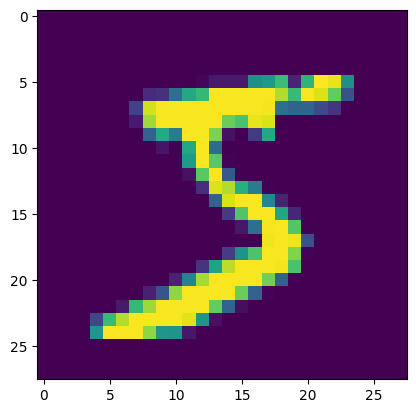

In [7]:
plt.imshow(training_images[0])

In [8]:
training_labels[0]

5

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),

tf.keras.layers.Dense(20, activation=tf.nn.relu),

tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [10]:
model.compile (optimizer='adam',

loss='sparse_categorical_crossentropy',

metrics=['accuracy'])

In [11]:
model.fit(training_images, training_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1875/1875 [==============================] - 26s 10ms/step - loss: 0.3990 - accuracy: 0.8901 - val_loss: 0.2608 - val_accuracy: 0.9258
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2378 - accuracy: 0.9333 - val_loss: 0.2210 - val_accuracy: 0.9351
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2015 - accuracy: 0.9419 - val_loss: 0.1941 - val_accuracy: 0.9409
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1792 - accuracy: 0.9478 - val_loss: 0.1800 - val_accuracy: 0.9464
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1627 - accuracy: 0.9522 - val_loss: 0.1718 - val_accuracy: 0.9492
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1513 - accuracy: 0.9557 - val_loss: 0.1703 - val_accuracy: 0.9493
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1430 - accuracy: 0.9579 - val_loss: 0.1671 - val_accura

In [13]:
# Define the directory where you want to save the model
export_dir = 'saved_model/1'

# Save the model to the specified directory
tf.saved_model.save(model, export_dir)

In [14]:
# Load the saved model using the TFLite Converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Convert the model to TensorFlow Lite format
tflite_model = converter.convert()

In [15]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

65620

In [16]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

[{'name': 'serving_default_flatten_input:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 9, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [19]:
import numpy as np

In [22]:
to_predict = val_images[0]
to_predict = np.float32(to_predict)
interpreter.set_tensor(input_details[0]['shape'], to_predict)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(tflite_results)

TypeError: SetTensor(): incompatible function arguments. The following argument types are supported:
    1. (self: tensorflow.lite.python.interpreter_wrapper._pywrap_tensorflow_interpreter_wrapper.InterpreterWrapper, i: int, value: handle, subgraph_index: int = 0) -> object

Invoked with: <tensorflow.lite.python.interpreter_wrapper._pywrap_tensorflow_interpreter_wrapper.InterpreterWrapper object at 0x7eb66213b8f0>, array([ 1, 28, 28], dtype=int32), array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.32941177, 0.7254902 , 0.62352943, 0.5921569 ,
        0.23529412, 0.14117648, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.87058824, 0.99607843, 0.99607843, 0.99607843,
        0.99607843, 0.94509804, 0.7764706 , 0.7764706 , 0.7764706 ,
        0.7764706 , 0.7764706 , 0.7764706 , 0.7764706 , 0.7764706 ,
        0.6666667 , 0.20392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2627451 , 0.44705883, 0.28235295, 0.44705883,
        0.6392157 , 0.8901961 , 0.99607843, 0.88235295, 0.99607843,
        0.99607843, 0.99607843, 0.98039216, 0.8980392 , 0.99607843,
        0.99607843, 0.54901963, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06666667, 0.25882354, 0.05490196, 0.2627451 ,
        0.2627451 , 0.2627451 , 0.23137255, 0.08235294, 0.9254902 ,
        0.99607843, 0.41568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.3254902 , 0.99215686,
        0.81960785, 0.07058824, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08627451, 0.9137255 , 1.        ,
        0.3254902 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5058824 , 0.99607843, 0.93333334,
        0.17254902, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23137255, 0.9764706 , 0.99607843, 0.24313726,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.52156866, 0.99607843, 0.73333335, 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03529412, 0.8039216 , 0.972549  , 0.22745098, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.49411765, 0.99607843, 0.7137255 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.29411766,
        0.9843137 , 0.9411765 , 0.22352941, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07450981, 0.8666667 ,
        0.99607843, 0.6509804 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.79607844, 0.99607843,
        0.85882354, 0.13725491, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14901961, 0.99607843, 0.99607843,
        0.3019608 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12156863, 0.8784314 , 0.99607843, 0.4509804 ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.52156866, 0.99607843, 0.99607843, 0.20392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23921569, 0.9490196 , 0.99607843, 0.99607843, 0.20392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4745098 , 0.99607843, 0.99607843, 0.85882354, 0.15686275,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4745098 , 0.99607843, 0.8117647 , 0.07058824, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]], dtype=float32)